# German Credit Reports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load data
column_names = ['CheckinAccount', 'Duration', 'CreditHistory', 'Purpose', 'CreditAmount',
         'SavingAccount', 'PresentEmpSince', 'InstRate', 'PersonalStatus',
         'OtherDebtors', 'ResidenceSince', 'Property', 'Age',
         'InstPlans', 'HousingType', 'CreditsAtBank',
         'Job', 'Dependents', 'Telephone', 'ForeignWorker', 'CreditStatus']
df = pd.read_csv( "dataset/GermanCreditReports/german.data", delim_whitespace = True, header = None, names = column_names )
df.head()

,CheckinAccount,Duration,CreditHistory,Purpose,CreditAmount,SavingAccount,PresentEmpSince,InstRate,PersonalStatus,OtherDebtors,...,Property,Age,InstPlans,HousingType,CreditsAtBank,Job,Dependents,Telephone,ForeignWorker,CreditStatus
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [4]:
# Convert Credit Status in 0 - Good,1 - Bad
df.CreditStatus = df.CreditStatus - 1

In [5]:
df.describe()

,Duration,CreditAmount,InstRate,ResidenceSince,Age,CreditsAtBank,Dependents,CreditStatus
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


In [6]:
# Looking datatype and shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
CheckinAccount     1000 non-null object
Duration           1000 non-null int64
CreditHistory      1000 non-null object
Purpose            1000 non-null object
CreditAmount       1000 non-null int64
SavingAccount      1000 non-null object
PresentEmpSince    1000 non-null object
InstRate           1000 non-null int64
PersonalStatus     1000 non-null object
OtherDebtors       1000 non-null object
ResidenceSince     1000 non-null int64
Property           1000 non-null object
Age                1000 non-null int64
InstPlans          1000 non-null object
HousingType        1000 non-null object
CreditsAtBank      1000 non-null int64
Job                1000 non-null object
Dependents         1000 non-null int64
Telephone          1000 non-null object
ForeignWorker      1000 non-null object
CreditStatus       1000 non-null int64
dtypes: int64(8), object(13)
memory usage: 164.1+ KB


In [7]:
# Looking unique values
df.nunique()

CheckinAccount       4
Duration            33
CreditHistory        5
Purpose             10
CreditAmount       921
SavingAccount        5
PresentEmpSince      5
InstRate             4
PersonalStatus       4
OtherDebtors         3
ResidenceSince       4
Property             4
Age                 53
InstPlans            3
HousingType          3
CreditsAtBank        4
Job                  4
Dependents           2
Telephone            2
ForeignWorker        2
CreditStatus         2
dtype: int64

## 1. Dataset without PCA - Replace catagories with dummies

In [8]:
df_d = df.copy() # No PCA. good for some models

In [9]:
df_o = df.copy() # original form 

In [10]:
# Can also use dummies in place of LabelEncoder. 
df_d = df
columnsToEncode=df_d.select_dtypes(include=[object]).columns
df_d = pd.get_dummies(df_d, columns=columnsToEncode, drop_first=True)
df_d.head()

,Duration,CreditAmount,InstRate,ResidenceSince,Age,CreditsAtBank,Dependents,CreditStatus,CheckinAccount_A12,CheckinAccount_A13,...,Property_A124,InstPlans_A142,InstPlans_A143,HousingType_A152,HousingType_A153,Job_A172,Job_A173,Job_A174,Telephone_A192,ForeignWorker_A202
0,6,1169,4,4,67,2,1,0,0,0,...,0,0,1,1,0,0,1,0,1,0
1,48,5951,2,2,22,1,1,1,1,0,...,0,0,1,1,0,0,1,0,0,0
2,12,2096,2,3,49,1,2,0,0,0,...,0,0,1,1,0,1,0,0,0,0
3,42,7882,2,4,45,1,2,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,24,4870,3,4,53,2,2,1,0,0,...,1,0,1,0,1,0,1,0,0,0


#### Train Test Split

In [11]:
#spliting in X and y
X_d,y_d = df_d.iloc[:,:-1], df_d.iloc[:,-1:].squeeze() 

In [12]:
#let's split the data into train and test. 
from sklearn.model_selection import train_test_split 
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=.20, random_state = 100)

# 2. Dataset with PCA for visualization

In [13]:
# LabelEncoder - Encoding categorical data to number, OneHotEncoder - row to column 
# only used for Type column
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.decomposition import PCA
pca = PCA(n_components = 1)

onehotencoder = OneHotEncoder()
le = LabelEncoder()    

for i in range(len(df.columns)):   
    if(df.iloc[:,i].dtype == 'object'):
        #df.iloc[:,i] = le.fit_transform(df.iloc[:,i]) # In new version its included in OneHotEncoder
        # One Hot Encoder
        enarray = onehotencoder.fit_transform(df[[df.columns[i]]]).toarray()
        # Applying PCA to bring back to one column. OHE can increase the dimensionality in a big way.
        df.iloc[:,i] = pca.fit_transform(enarray)

df.head()

,CheckinAccount,Duration,CreditHistory,Purpose,CreditAmount,SavingAccount,PresentEmpSince,InstRate,PersonalStatus,OtherDebtors,...,Property,Age,InstPlans,HousingType,CreditsAtBank,Job,Dependents,Telephone,ForeignWorker,CreditStatus
0,-0.523422,6,0.851680,0.750017,1169,0.886798,-0.629893,4,-0.549609,-0.114084,...,-0.631911,67,-0.235762,-0.353254,2,-0.444717,1,0.842871,-0.052326,0
1,-0.488249,48,-0.554244,0.750017,5951,-0.452352,0.727529,2,0.858954,-0.114084,...,-0.631911,22,-0.235762,-0.353254,1,-0.444717,1,-0.571342,-0.052326,1
2,0.718069,12,0.851680,-0.075092,2096,-0.452352,-0.232096,2,-0.549609,-0.114084,...,-0.631911,49,-0.235762,-0.353254,1,0.879167,2,-0.571342,-0.052326,0
3,-0.523422,42,-0.554244,-0.201098,7882,-0.452352,-0.232096,2,-0.549609,1.178748,...,-0.221661,45,-0.235762,0.665350,1,-0.444717,2,-0.571342,-0.052326,0
4,-0.523422,24,0.266637,-0.626269,4870,-0.452352,0.727529,3,-0.549609,-0.114084,...,-0.110126,53,-0.235762,0.665350,2,-0.444717,2,-0.571342,-0.052326,1


#### Train Test Split

In [14]:
#spliting in X and y
X,y = df.iloc[:,:-1], df.iloc[:,-1:].squeeze() 

In [15]:
#let's split the data into train and test. 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state = 100)

# Visualization and Analysis

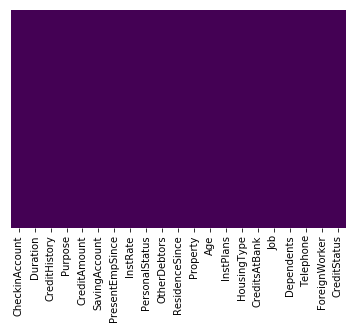

In [16]:
# to check missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Identifying corelation

In [17]:
#shows corelation between columns in matrix form
tc = df.corr()   

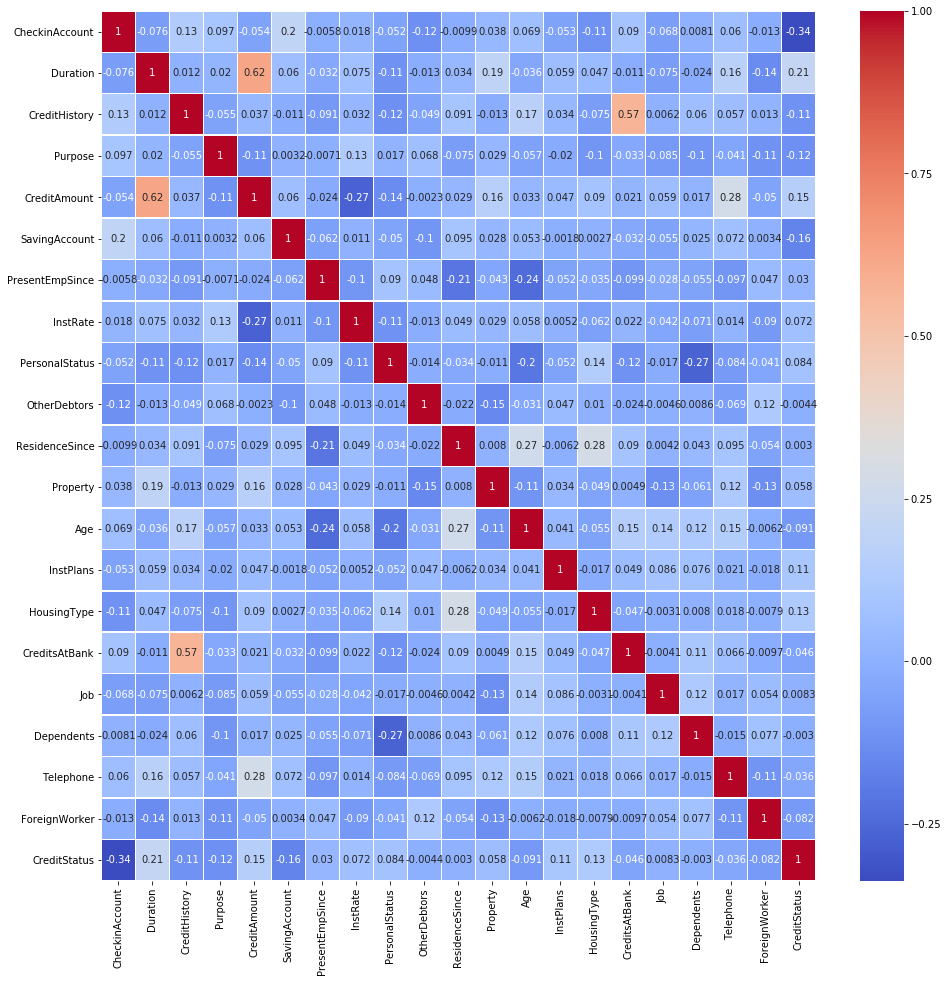

In [18]:
# Plotting corelation
plt.figure(figsize=(16, 16))
sns.heatmap(tc, annot=True, linewidths=.5, cmap='coolwarm')

We can see column CreditStatus is having better corellation to columns Duration, CreditAmount, InstPlans, HousingType. 

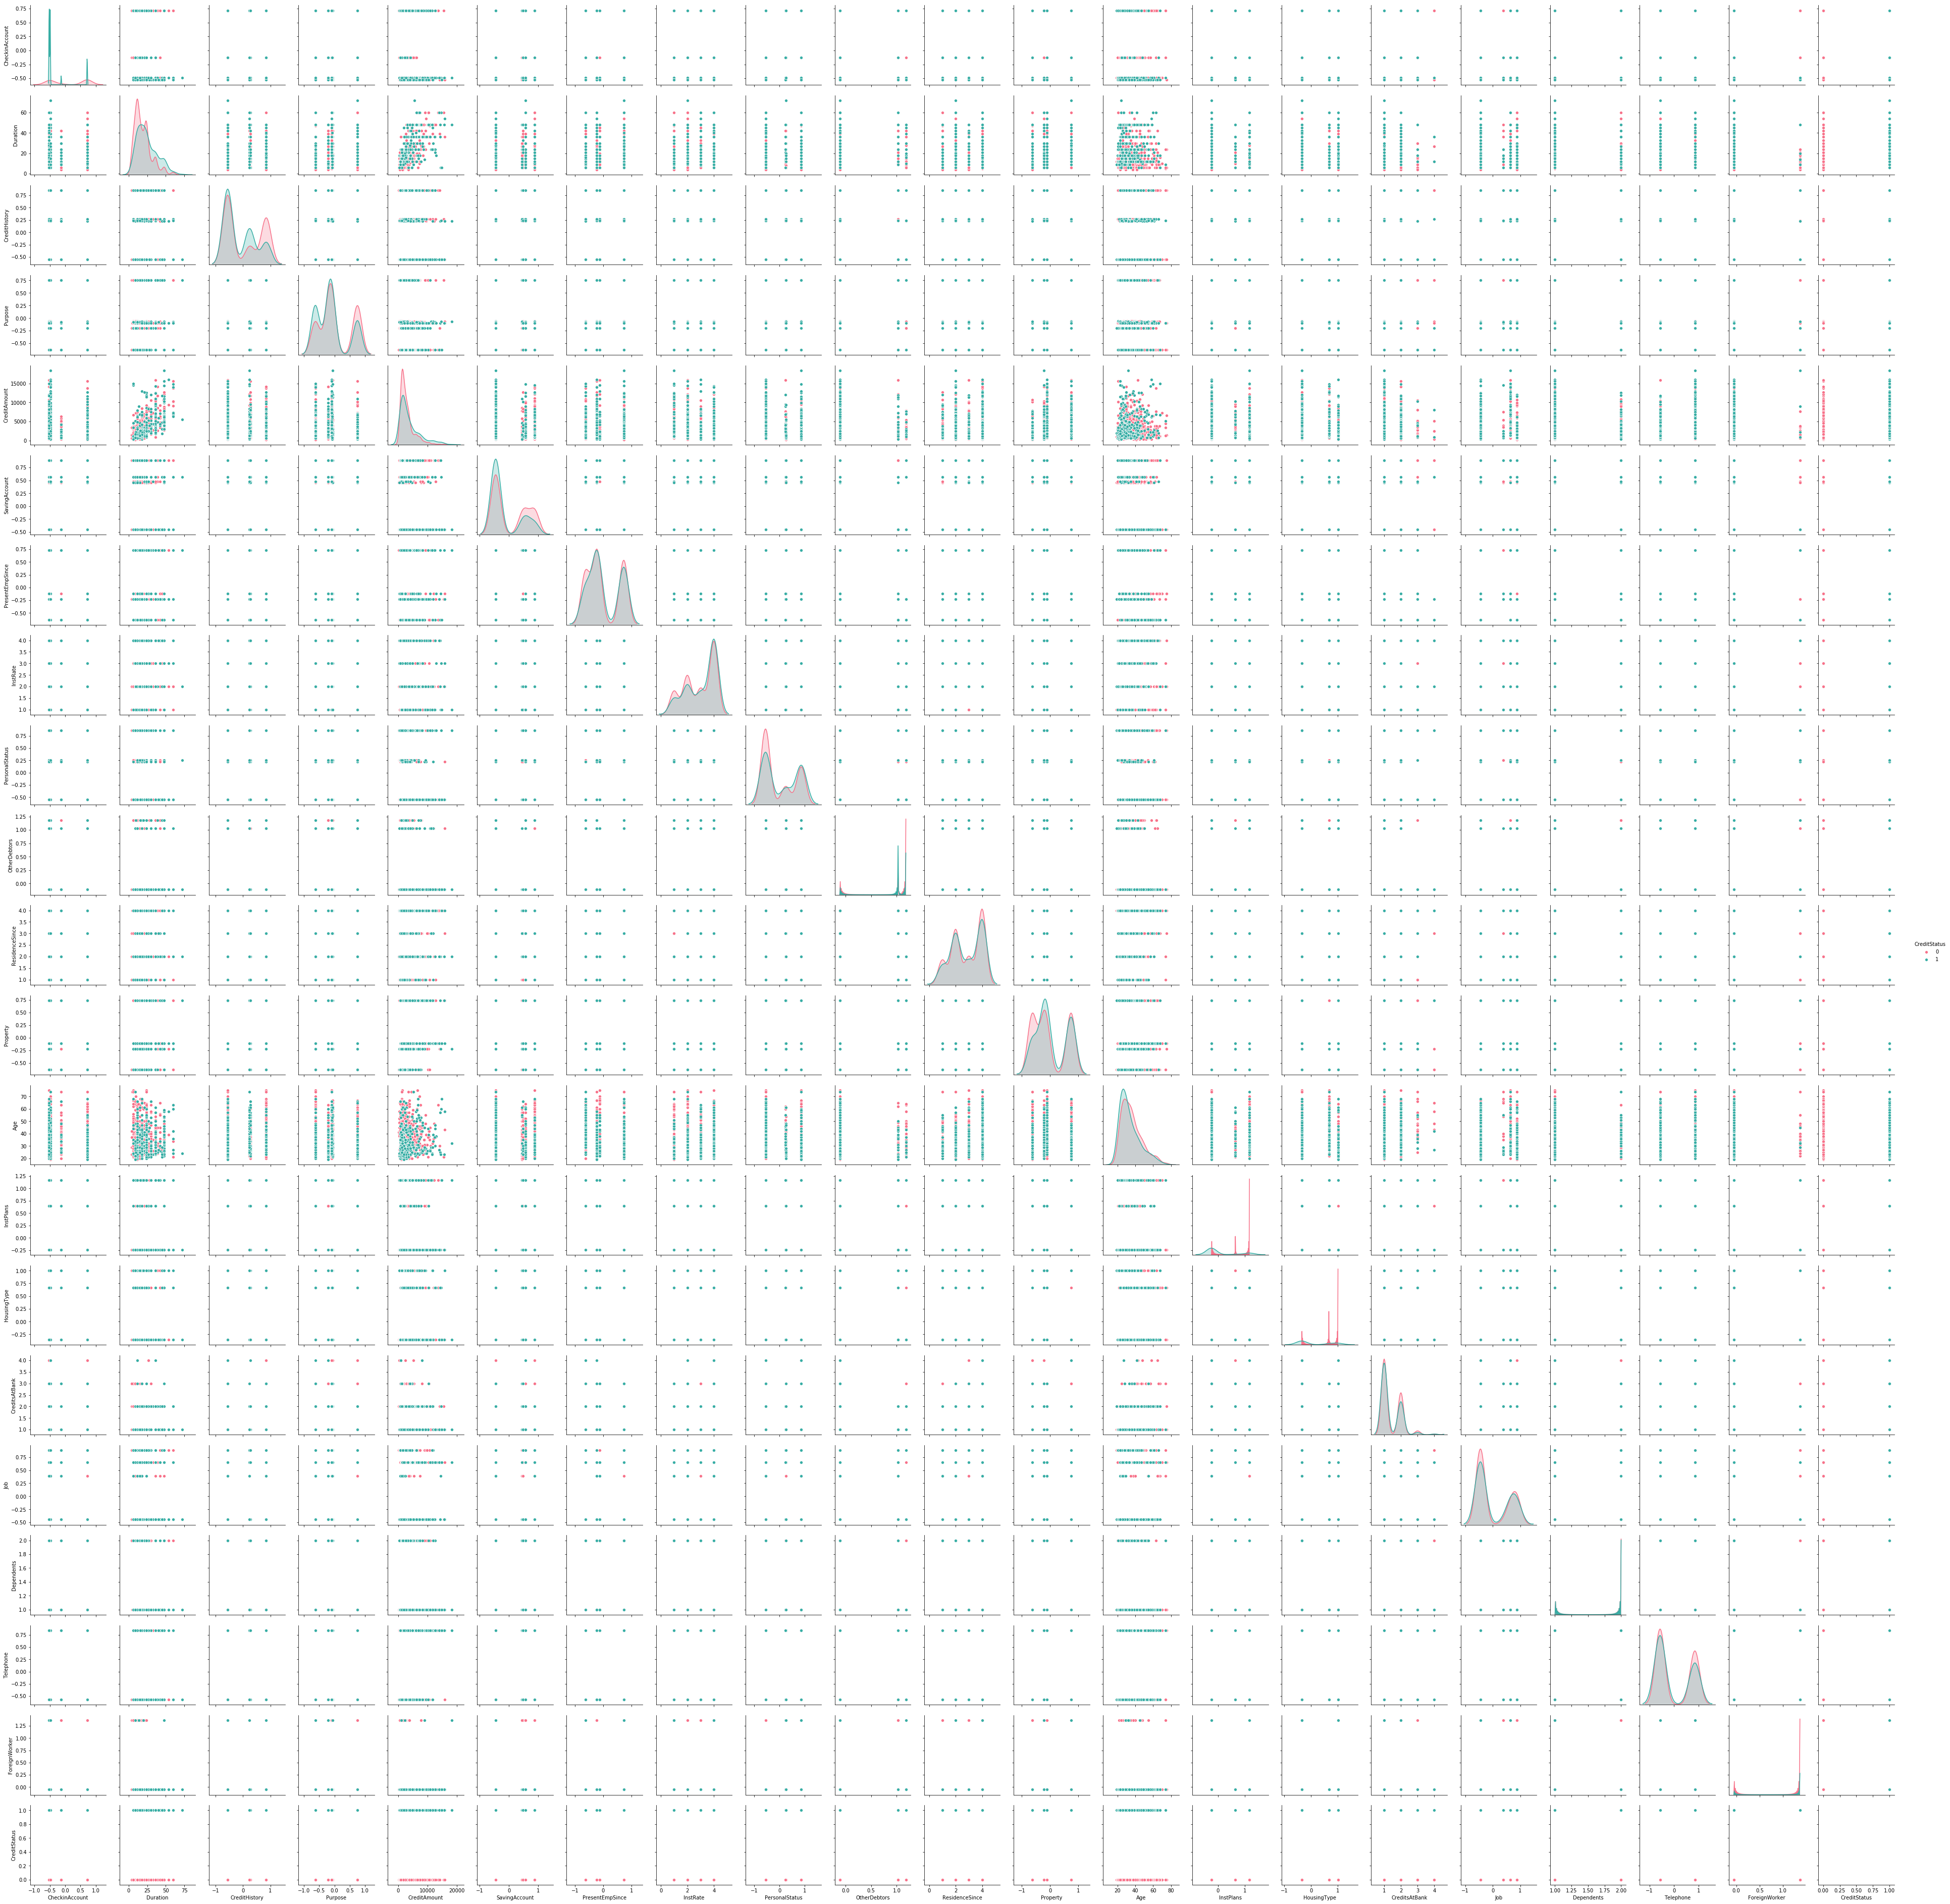

In [19]:
# to see pattern
sns.pairplot(data=df, hue="CreditStatus", palette="husl")

Few points to note from pairplot
* I would suggest to save this pairplot as image and enlarge it to analyze it. 
* This pairplot shows credit status does not highly depend on any one column. 
* Interesting to see CreditAmount is linearly depended on Duration. 
* Also, Age and Credit amount are also showing linear relationship. 
* Age distribution is normal.

### Distribution Analysis

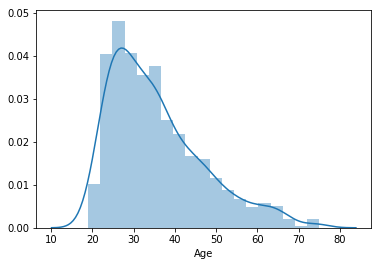

In [20]:
# visualize distribution
sns.distplot(df['Age']) #histogram, kde(kernel density estimation) is line

Most common age is 21-35.

Text(0, 0.5, 'Frequency')

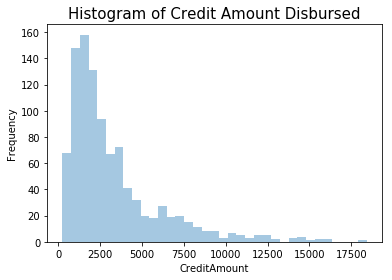

In [21]:
#Lets check how does the distribution of credit amount disbursed
sns.distplot( df.CreditAmount, kde = False )
plt.title( "Histogram of Credit Amount Disbursed", fontsize = 15)
plt.ylabel( "Frequency")

Text(0.5, 1.0, 'Boxplot of Credit Amount Disbursed')

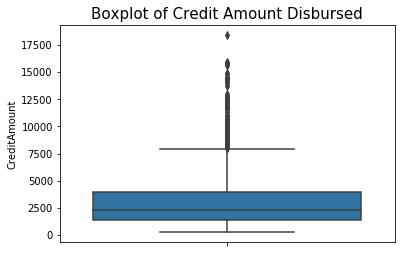

In [22]:
sns.boxplot( df.CreditAmount, orient = 'v' )
plt.title( "Boxplot of Credit Amount Disbursed", fontsize = 15)

We can see most of the credit amount is in between 1400-4000.

Text(0.5, 1.0, 'Boxplot of Credit Amount Disbursed by Credit Status Bad or not')

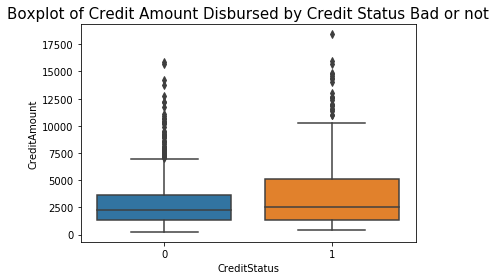

In [23]:
sns.boxplot( x = 'CreditStatus', y = 'CreditAmount', data = df, orient = 'v' )
plt.title( "Boxplot of Credit Amount Disbursed by Credit Status Bad or not", fontsize = 15)

It clearly shows higher the credit amount better chance of default. It also reflect defaults are more prominent when credit amount goes beyond 10000.

### Lets check credit default rates

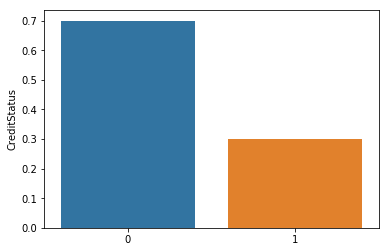

In [24]:
# Lets check credit default rates
df_rate = pd.DataFrame( df.CreditStatus.value_counts( normalize=True ) )
df_rate
sns.barplot( x = df_rate.index, y = df_rate.CreditStatus )

It shows credit default rate is 30%

### Analyzing Interest Rates against Credit Defaults

In [25]:
df.InstRate.unique()

array([4, 2, 3, 1])

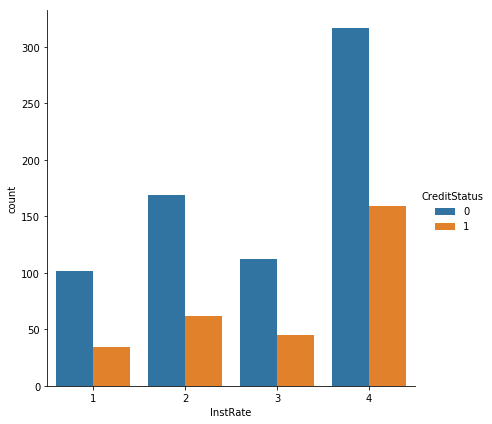

In [26]:
df_rate_count = df[['InstRate', 'CreditStatus']].groupby(['InstRate', 'CreditStatus']).size().reset_index()
df_rate_count.columns = ['InstRate', 'CreditStatus', 'count']

grf = sns.factorplot(x="InstRate", y = 'count', hue="CreditStatus", data=df_rate_count,
                 size=6, kind="bar")

By seeing this graph, we can conclude higher the rate greater the chance of default.

### Is bad credits related to having checkin account

Text(1, 0.5, 'A11 :      ... <    0 DM\nA12 : 0 <= ... <  200 DM\nA13 :      ... >= 200 DM, salary assignments for at least 1 year\nA14 : no checking account')

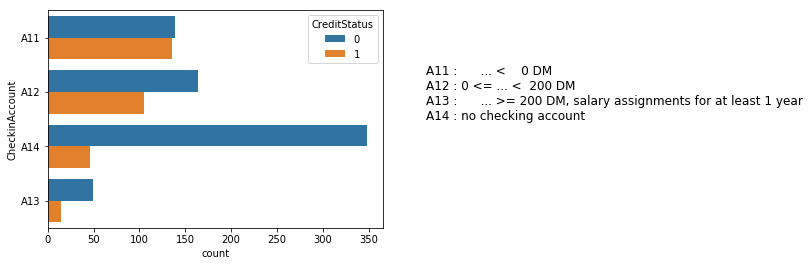

In [27]:
figure_text = '''A11 :      ... <    0 DM
A12 : 0 <= ... <  200 DM
A13 :      ... >= 200 DM, salary assignments for at least 1 year
A14 : no checking account'''
sns.countplot( y = 'CheckinAccount', hue = 'CreditStatus', data = df_o )
plt.figtext(1, 0.5,figure_text, wrap=True, horizontalalignment='left', fontsize=12)

Customers with A14 : no checking account have lesser chance of defaulting other hand customers having checkin account without any balance have higher chance of defaulting.

## Impact of credit history on bad credits

Text(1, 0.5, 'A30 : no credits taken/ all credits paid back duly \n\nA31 : all credits at this bank paid back duly \n\nA32 : existing credits paid back duly till now \n\nA33 : delay in paying off in the past \n\nA34 : critical account/ other credits existing (not at this bank) ')

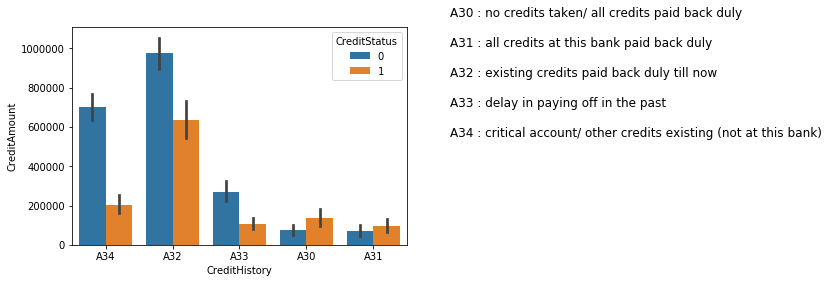

In [28]:
figure_text = """A30 : no credits taken/ all credits paid back duly \n
A31 : all credits at this bank paid back duly \n
A32 : existing credits paid back duly till now \n
A33 : delay in paying off in the past \n
A34 : critical account/ other credits existing (not at this bank) """
sns.barplot( x = 'CreditHistory', y = 'CreditAmount', hue = 'CreditStatus', data = df_o, estimator = sum )
plt.figtext(1, 0.5,figure_text, wrap=True, horizontalalignment='left', fontsize=12)

### Regression relationship between Credit amount and Duration

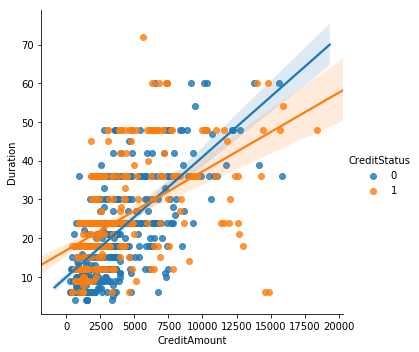

In [29]:
# Regression relationship betweeb Credit amount and Duration
sns.lmplot(x='CreditAmount',y='Duration',data=df,hue='CreditStatus')

Customers taking credit for large amount for lesser duration are making default mostly. This kind of loans can be restricted.

## Impact of age on credits

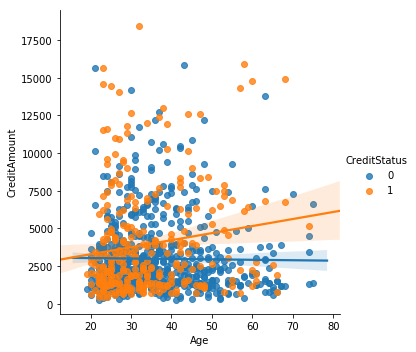

In [30]:
sns.lmplot( x = 'Age', y = 'CreditAmount', hue = 'CreditStatus', fit_reg = True, data = df_o )

Most defaulted loans are taken by age group 20-30. Which can be scrutinized more to avoid defaults.

## Impact of personal status on bad credit

Text(1, 0.3, 'A91 : male : divorced/separated \n\nA92 : female : divorced/separated/married \n\nA93 : male : single \n\nA94 : male : married/widowed \n\nA95 : female : single')

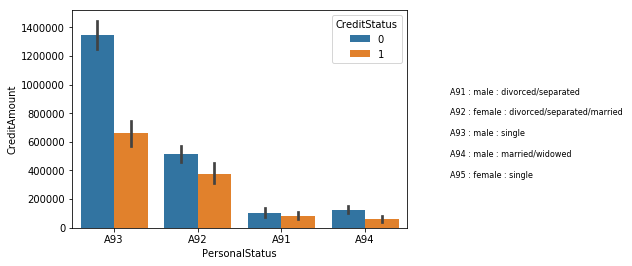

In [31]:
personal_text = '''A91 : male : divorced/separated \n
A92 : female : divorced/separated/married \n
A93 : male : single \n
A94 : male : married/widowed \n
A95 : female : single'''
sns.barplot( x = 'PersonalStatus', y = 'CreditAmount', hue = 'CreditStatus', data = df_o, estimator = sum )
plt.figtext(1, 0.3,personal_text, wrap=True, horizontalalignment='left', fontsize=8)

Single male and female have better chance for repay.

# Model compare - highlevel

In [32]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.model_selection import GridSearchCV

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

LR: 0.441903 (0.069693)
LDA: 0.472616 (0.063147)
KNN: 0.235040 (0.114594)
CART: 0.507069 (0.079037)
NB: 0.585749 (0.085666)
RF: 0.322535 (0.093740)
SVM: 0.000000 (0.000000)
XGB: 0.459895 (0.093130)


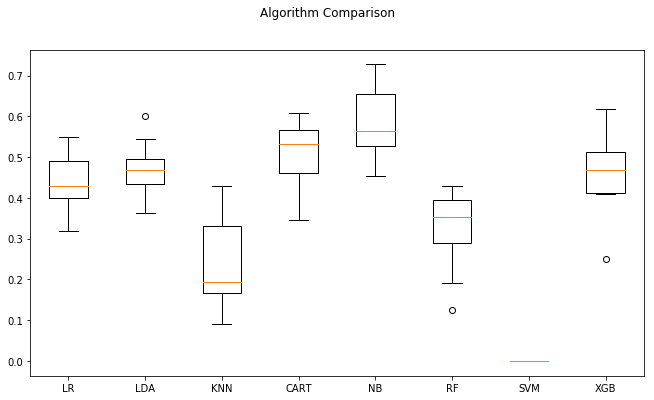

In [33]:
# to feed the random state
seed = 7

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'recall'

for name, model in models:
        kfold = KFold(n_splits=10, random_state=seed)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Classification with RF feature importances

Doing Random Forests first to get classify loan default or not and detect feature importances.

# Random Forests

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000, n_jobs=10, max_depth=8.75)
rfc.fit(X_train_d, y_train_d)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8.75, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=10,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [35]:
#plot_learning_curve(estimator, title, X_train_d, y_train_d, cv=cv) 
#plt.show()

In [36]:
rfc_pred = rfc.predict(X_test_d)

In [37]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rfc, X = X_train_d, y = y_train_d, cv = 10)
accuracies.mean()

0.9700586029067042

In [38]:
accuracies.std()

0.0057947180001991375

In [39]:
rfc.feature_importances_

array([8.95845812e-02, 1.54312533e-01, 5.46287232e-02, 3.92356640e-02,
       9.61376939e-02, 1.90173433e-02, 1.80235740e-02, 1.49207345e-02,
       1.15744229e-02, 2.81720163e-02, 1.87521949e-02, 6.78365463e-03,
       1.58871349e-02, 1.46784684e-03, 1.43070250e-02, 1.12590588e-02,
       1.18784470e-02, 1.24067090e-02, 1.39206483e-02, 8.54897462e-05,
       7.03333200e-04, 9.64015048e-04, 5.12350093e-04, 5.17009058e-03,
       5.53406105e-03, 1.10834417e-03, 2.26640354e-02, 1.91075676e-02,
       2.14049715e-02, 2.01903548e-02, 2.07305700e-02, 7.44170969e-03,
       1.98707169e-02, 1.76162083e-02, 1.76070386e-02, 2.20937690e-02,
       2.49545859e-02, 2.86470286e-02, 1.61908530e-02, 3.37444711e-03,
       9.26656168e-04, 1.44415736e-02, 1.50113236e-02, 1.36970107e-03,
       2.07145049e-02, 1.73347069e-02, 3.89245244e-03, 1.80675353e-02])

In [40]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_d,rfc_pred))

[[187   0]
 [ 13   0]]


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test_d,rfc_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       187
           1       0.00      0.00      0.00        13

   micro avg       0.94      0.94      0.94       200
   macro avg       0.47      0.50      0.48       200
weighted avg       0.87      0.94      0.90       200



In [42]:
#from sklearn.metrics import accuracy_score 
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test_d,rfc_pred)*100)

Accuracy :  93.5


In [43]:
#MAE L1 loss function - Should be close to 0
from sklearn.metrics import mean_absolute_error  
mean_absolute_error(y_test_d,rfc_pred) #y_target, y_pred

16.575

In [44]:
# MSE L2 loss - Should be close to 0
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_test_d,rfc_pred) #y_target, y_pred

0.065

In [45]:
# Log Loss  - Should be close to 0 - Only for classification models
from sklearn.metrics import log_loss
log_loss(y_test_d,rfc_pred)

2.245020465669195

We got very good accurecy score of 93.5.

# Clustering

## K-Means Clustering

How can I see what segments of credit amounts are there with respect to age. Let's do clustring and get idea.

In [47]:
X_clus = df[['Age', 'CreditAmount']]

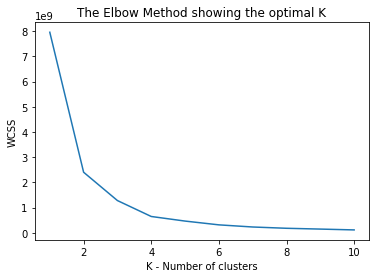

In [48]:
# Using the elbow method to get the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_clus)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method showing the optimal K')
plt.xlabel('K - Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [49]:
# Fitting K-Means to the sample dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_clus)

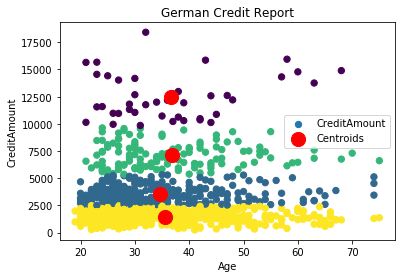

In [50]:
# Scatter chart of the clusters
plt.scatter(X_clus.iloc[:, 0], X_clus.iloc[:, 1], c=y_kmeans, s=40, cmap='viridis');
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'red', label = 'Centroids')
plt.title('German Credit Report')
plt.xlabel('Age')
plt.ylabel('CreditAmount')
plt.legend()
plt.show()

We can see a clear grouping of loan amounts and can also see outliers. Blue and yellow are the most popular loans among all ages.

## GMM Clustering

How can I see what segments of credit duration exists with respect to age. So I can focus on those loans. Let's do GMM clustring and get idea.

In [51]:
X_clus_gmm = df[['Age', 'Duration']]

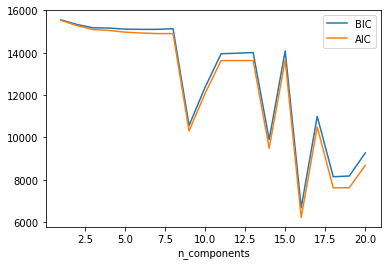

In [52]:
from sklearn.mixture import GaussianMixture as GMM
# Fitting GMM to the dataset
# plotting Akaike information criterion (AIC) or the Bayesian information criterion (BIC) to get K clusters
n_components = np.arange(1, 21)
#print(X)
models = [GMM(n, covariance_type='full', random_state=0).fit(X_clus_gmm) for n in n_components]

plt.plot(n_components, [m.bic(X_clus_gmm) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X_clus_gmm) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

We can see first knee is at 7.

In [53]:
# Fitting GMM to the dataset
#gmm = GMM(n_components=4, covariance_type='full', random_state=42).fit(X)
gmm = GMM(n_components=7).fit(X_clus_gmm)
labels = gmm.predict(X_clus_gmm)

In [54]:
# Akaike information criteria (AIC) - measures relative quality of a model for a given set of data. 
# model with less AIC is preferred over higher value. AIC = -2*ln(L) + 2*k
#  L - Maximum value of Likelihood. k - Number of variables included in the model
print(gmm.aic(X_clus_gmm)) # model.aic(X))

13710.059365840472


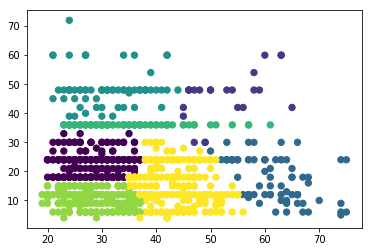

In [55]:
# Scatter chart of the clusters
plt.scatter(X_clus_gmm.iloc[:, 0], X_clus_gmm.iloc[:, 1], c=labels, s=40, cmap='viridis');

There is no clear segmentation for duration whereas K-Means did detect better clusters in Credit amounts. Still can see 4 segments in age 10-45 and duration 5-50.

In [56]:
'''# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_pca, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-Means Classification (Training set)')
plt.xlabel('Feature-1')
plt.ylabel('Feature-2')
plt.legend()
plt.show()'''

"# Visualising the Training set results\nfrom matplotlib.colors import ListedColormap\nX_set, y_set = X_train_pca, y_train\nX1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),\n                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))\nplt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),\n             alpha = 0.75, cmap = ListedColormap(('red', 'green')))\nplt.xlim(X1.min(), X1.max())\nplt.ylim(X2.min(), X2.max())\nfor i, j in enumerate(np.unique(y_set)):\n    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],\n                c = ListedColormap(('red', 'green'))(i), label = j)\nplt.title('K-Means Classification (Training set)')\nplt.xlabel('Feature-1')\nplt.ylabel('Feature-2')\nplt.legend()\nplt.show()"

# Regression

## Linear Regression

Duration and Credit amount have linear relationship. Lets predict using linear model

**Let determine for given duration how much loan can be approved**

In [57]:
df_safe = df[['Duration', 'CreditAmount', 'CreditStatus']].loc[df['CreditStatus'] == 0]
df_safe.describe()

,Duration,CreditAmount,CreditStatus
count,700.000000,700.000000,700.0
mean,19.207143,2985.457143,0.0
std,11.079564,2401.472278,0.0
min,4.000000,250.000000,0.0
25%,12.000000,1375.500000,0.0
50%,18.000000,2244.000000,0.0
75%,24.000000,3634.750000,0.0
max,60.000000,15857.000000,0.0


In [58]:
Xl = df_safe[['Duration']]
yl = df_safe.CreditAmount

In [59]:
Xl_train, Xl_test, yl_train, yl_test = train_test_split(Xl, yl, test_size=.20, random_state = 100)

In [60]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [61]:
lm.fit(Xl_train,yl_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [62]:
predictions = lm.predict(Xl_test)

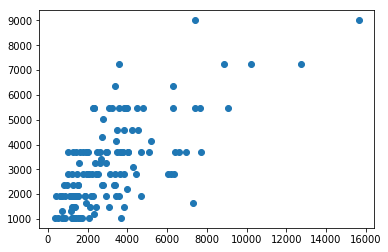

In [63]:
plt.scatter(yl_test,predictions)

#### Validation

In [64]:
from sklearn import metrics

In [65]:
print('MAE:', metrics.mean_absolute_error(yl_test, predictions))
print('MSE:', metrics.mean_squared_error(yl_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(yl_test, predictions)))

MAE: 1305.5788675871079
MSE: 3073173.6554383
RMSE: 1753.0469632723193


In [66]:
from sklearn.metrics import r2_score
r2_score(yl_test, predictions)

0.4593050626468429

We can predict what amount can be approved for certain credit duration however it did not perform very good as R2 score is not in good territory.

# Classification

## Logistic Regression

Let's classify loan can be defaulted or not. Applying Logistic Regression.

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
logmodel = LogisticRegression()
logmodel.fit(X_train_d,y_train_d)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [69]:
predictions = logmodel.predict(X_test_d)

#### Validation

In [70]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = logmodel, X = X_train_d, y = y_train_d, cv = 10)
accuracies.mean()

0.9675427801218941

In [71]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_d,predictions))

[[187   0]
 [ 13   0]]


In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test_d,predictions))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       187
           1       0.00      0.00      0.00        13

   micro avg       0.94      0.94      0.94       200
   macro avg       0.47      0.50      0.48       200
weighted avg       0.87      0.94      0.90       200



In [73]:
#from sklearn.metrics import accuracy_score 
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test_d,predictions)*100)

Accuracy :  93.5


In [74]:
#MAE L1 loss function - Should be close to 0
from sklearn.metrics import mean_absolute_error  
mean_absolute_error(y_test_d,predictions) #y_target, y_pred

16.575

In [75]:
#MAE L1 loss function - Should be close to 0
from sklearn.metrics import mean_absolute_error  
mean_absolute_error(y_test_d,predictions) #y_target, y_pred

16.575

In [76]:
# Log Loss  - Should be close to 0 - Only for classification models
from sklearn.metrics import log_loss
log_loss(y_test_d,predictions)

2.245020465669195

In [77]:
# Visualising the Training set results
'''from matplotlib.colors import ListedColormap
X_set, y_set = X_train_d, y_train_d
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()'''

"from matplotlib.colors import ListedColormap\nX_set, y_set = X_train_d, y_train_d\nX1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),\n                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))\nplt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),\n             alpha = 0.75, cmap = ListedColormap(('red', 'green')))\nplt.xlim(X1.min(), X1.max())\nplt.ylim(X2.min(), X2.max())\nfor i, j in enumerate(np.unique(y_set)):\n    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],\n                c = ListedColormap(('red', 'green'))(i), label = j)\nplt.title('Logistic Regression (Training set)')\nplt.xlabel('Age')\nplt.ylabel('Estimated Salary')\nplt.legend()\nplt.show()"

Logistic regression performed really well with Accuracy :  93.5.

## Naive Bayes

Lest classify with Naive Bayes

In [78]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train_d, y_train_d)

GaussianNB(priors=None, var_smoothing=1e-09)

In [79]:
# Predicting the Test set results
y_pred_nb = classifier.predict(X_test_d)

#### Validation

In [80]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_d, y_pred_nb)
cm

array([[122,  65],
       [  4,   9]])

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test_d,y_pred_nb))

              precision    recall  f1-score   support

           0       0.97      0.65      0.78       187
           1       0.12      0.69      0.21        13

   micro avg       0.66      0.66      0.66       200
   macro avg       0.54      0.67      0.49       200
weighted avg       0.91      0.66      0.74       200



In [82]:
#from sklearn.metrics import accuracy_score 
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test_d,y_pred_nb)*100)

Accuracy :  65.5


This good but not as good as Logistic Regression.

## Decision Tree

Lest classify with Decision Tree

In [83]:
classifier = DecisionTreeClassifier(criterion ='entropy')
classifier.fit(X_train_d, y_train_d)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [84]:
y_pred_d = classifier.predict(X_test_d)

In [85]:
classifier.feature_importances_

array([0.10046283, 0.22612764, 0.05958496, 0.01732023, 0.11398561,
       0.05629664, 0.        , 0.        , 0.        , 0.        ,
       0.01456248, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02912497, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01600673, 0.04161353, 0.04644764, 0.        ,
       0.07276986, 0.        , 0.01679958, 0.        , 0.        ,
       0.02000941, 0.05711632, 0.        , 0.        , 0.        ,
       0.        , 0.01953364, 0.03488159, 0.        , 0.        ,
       0.03542956, 0.        , 0.02192678])

#### Validation

In [86]:
confusion_matrix(y_test_d, y_pred_d) 

array([[184,   3],
       [ 11,   2]])

In [87]:
print(classification_report(y_test_d,y_pred_d))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       187
           1       0.40      0.15      0.22        13

   micro avg       0.93      0.93      0.93       200
   macro avg       0.67      0.57      0.59       200
weighted avg       0.91      0.93      0.92       200



In [88]:
print ("Accuracy : ", accuracy_score(y_test_d,y_pred_d)*100)

Accuracy :  93.0


In [89]:
#install
#conda install -c https://conda.binstar.org/sstromberg pydot
#conda install GraphViz
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(X_train_d)
features

['Duration',
 'CreditAmount',
 'InstRate',
 'ResidenceSince',
 'Age',
 'CreditsAtBank',
 'Dependents',
 'CreditStatus',
 'CheckinAccount_A12',
 'CheckinAccount_A13',
 'CheckinAccount_A14',
 'CreditHistory_A31',
 'CreditHistory_A32',
 'CreditHistory_A33',
 'CreditHistory_A34',
 'Purpose_A41',
 'Purpose_A410',
 'Purpose_A42',
 'Purpose_A43',
 'Purpose_A44',
 'Purpose_A45',
 'Purpose_A46',
 'Purpose_A48',
 'Purpose_A49',
 'SavingAccount_A62',
 'SavingAccount_A63',
 'SavingAccount_A64',
 'SavingAccount_A65',
 'PresentEmpSince_A72',
 'PresentEmpSince_A73',
 'PresentEmpSince_A74',
 'PresentEmpSince_A75',
 'PersonalStatus_A92',
 'PersonalStatus_A93',
 'PersonalStatus_A94',
 'OtherDebtors_A102',
 'OtherDebtors_A103',
 'Property_A122',
 'Property_A123',
 'Property_A124',
 'InstPlans_A142',
 'InstPlans_A143',
 'HousingType_A152',
 'HousingType_A153',
 'Job_A172',
 'Job_A173',
 'Job_A174',
 'Telephone_A192']

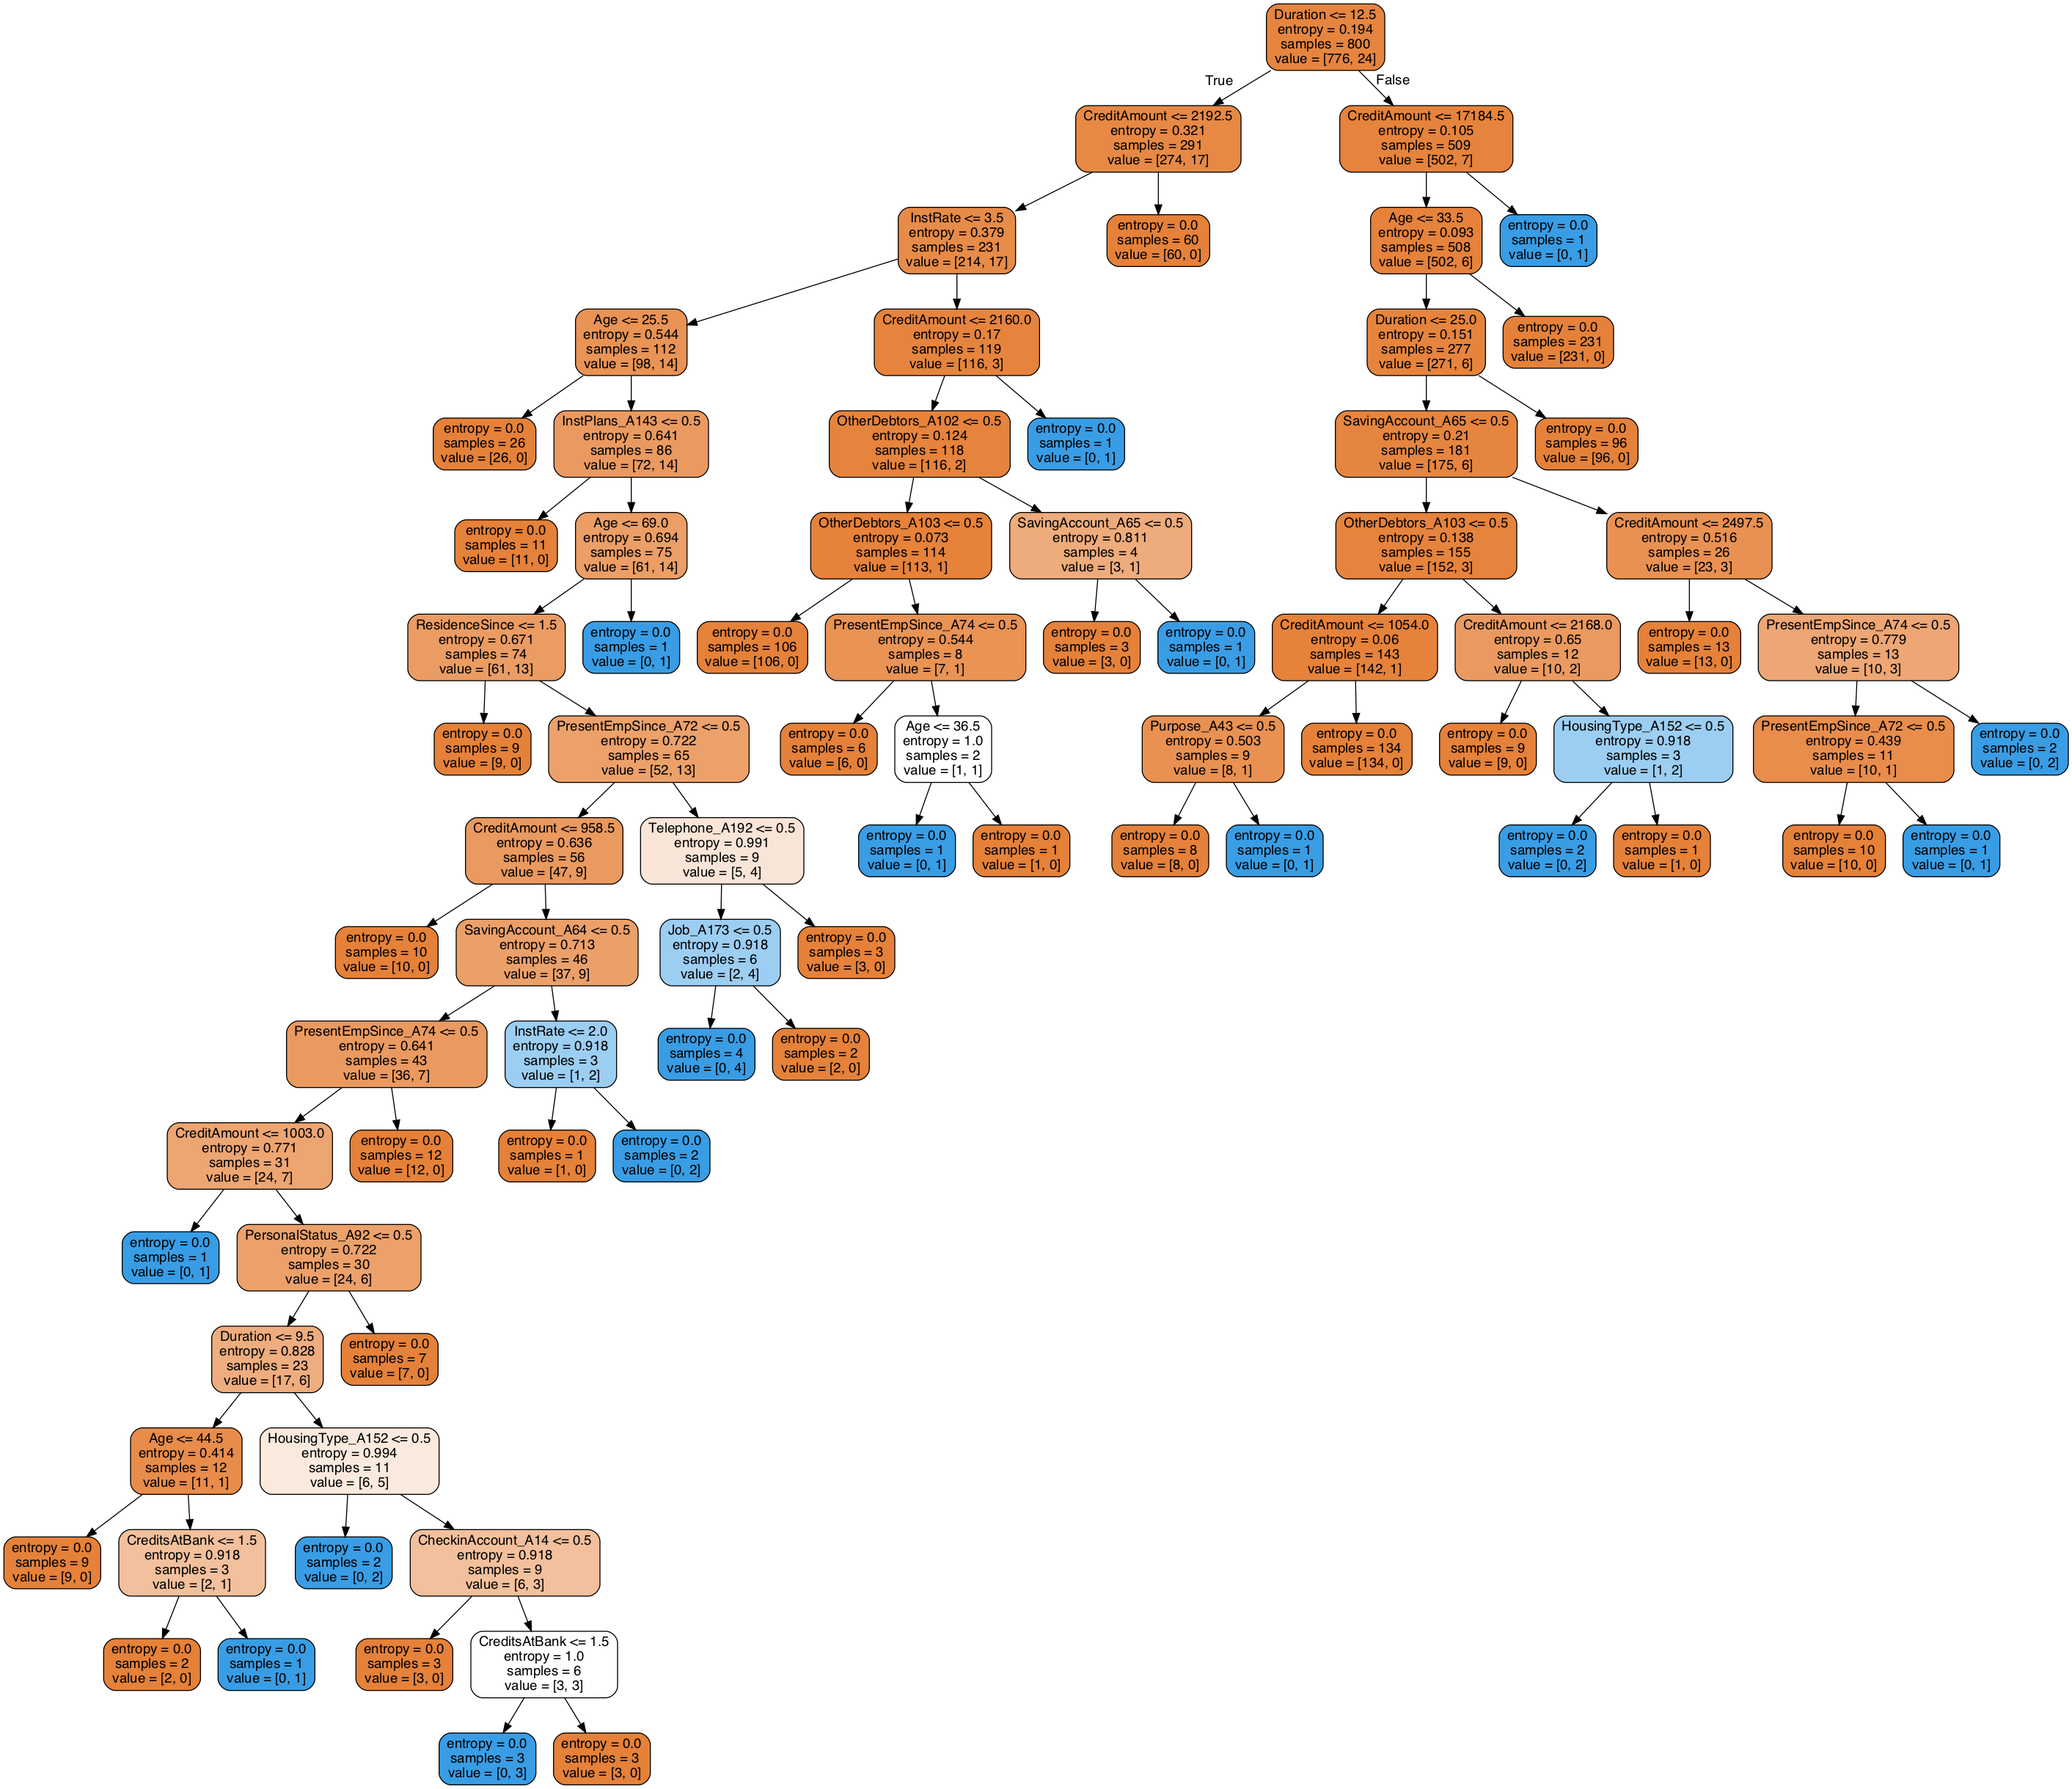

In [90]:
dot_data = StringIO()  
export_graphviz(classifier, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

This the best Accuracy we got so far. It beats Random Forest as we already did.

## SVM

Lets apply SVM to classify credit default status and compare with other models.

In [91]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0, gamma='auto')
classifier.fit(X_train_d, y_train_d)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [92]:
# Predicting the Test set results
y_pred_sv = classifier.predict(X_test_d)

#### Validation

In [93]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test_d, y_pred_sv)
print(cm)

[[187   0]
 [ 13   0]]


In [94]:
print(classification_report(y_test_d,y_pred_sv))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       187
           1       0.00      0.00      0.00        13

   micro avg       0.94      0.94      0.94       200
   macro avg       0.47      0.50      0.48       200
weighted avg       0.87      0.94      0.90       200



In [95]:
#from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test_d,y_pred_sv)*100)

Accuracy :  93.5


We got Accuracy :  93.5 which is same as RF.

## K Nearest Neighbors (KNN)

Lets apply KNN to classify credit default status and compare with other models.
#### Algo

  1. Select K number of neighbors. E.g. k=5
  2. Select 5 nearest neighbors as per Euclidean distance 
  3. Among these K neighbors, count the number of data points in each category
  4. Assign the new data point to the category where you counted the most neighbors

### PCA - to reduce dimentions to 2 so we can visualize

In [104]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train_pca_d = pca.fit_transform(X_train_d)
X_test_pca_d = pca.transform(X_test_d)
explained_variance = pca.explained_variance_ratio_

In [105]:
from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier1.fit(X_train_pca_d, y_train_d)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [106]:
# Predicting the Test set results
y_pred_k = classifier1.predict(X_test_pca_d)

#### Valication

In [107]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test_d, y_pred_k)
cm

array([[187,   0],
       [ 13,   0]])

In [108]:
print(classification_report(y_test_d,y_pred_k))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       187
           1       0.00      0.00      0.00        13

   micro avg       0.94      0.94      0.94       200
   macro avg       0.47      0.50      0.48       200
weighted avg       0.87      0.94      0.90       200



In [109]:
#from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test_d,y_pred_k)*100)

Accuracy :  93.5


Following visualization takes more time and laptop does not support so not executing.

In [102]:
# Visualising the Training set results  
'''from matplotlib.colors import ListedColormap
X_set, y_set = X_train_pca_d, y_train_d
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()'''

"from matplotlib.colors import ListedColormap\nX_set, y_set = X_train_pca_d, y_train_d\nX1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),\n                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))\nplt.contourf(X1, X2, classifier1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),\n             alpha = 0.75, cmap = ListedColormap(('red', 'green')))\nplt.xlim(X1.min(), X1.max())\nplt.ylim(X2.min(), X2.max())\nfor i, j in enumerate(np.unique(y_set)):\n    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],\n                c = ListedColormap(('red', 'green'))(i), label = j)\nplt.title('Classifier (Training set)')\nplt.xlabel('Feature 1')\nplt.ylabel('Feature 2')\nplt.legend()\nplt.show()"

# Model Selection

In [110]:
# Applying k-Fold Cross Validation for SVM
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train_pca_d, y = y_train, cv = 10)
accuracies.mean()

0.6949929676511954

In [111]:
accuracies.std()

0.005487414132625039

In [113]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100], 'kernel': ['linear']},
              {'C': [1, 10, 100], 'kernel': ['rbf'], 'gamma': [0.1, 0.5]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
x_t_h = X_train_pca_d[:20]# Taking head so I can run fast. In real world remove head
y_t_h = y_train.head(20)

In [114]:
grid_search = grid_search.fit(x_t_h, y_t_h) # Taking head so I can run fast. In real world remove head

/Users/mk194903/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [115]:
best_accuracy = grid_search.best_score_
best_accuracy

0.8

In [116]:
best_parameters = grid_search.best_params_  # Best parameter to select in model training
best_parameters 

{'C': 1, 'kernel': 'linear'}

We can use these parameter to get best model accurecy. Since I run for just 20 rows due to laptop limitation it will not be feasible. But it can be done in same way.

# Conclusion:
Classification model predicts can default or not. After evaluating all the classification models, we can conclude Decision Tree and random performed best.